In [1]:
import numpy as np

In [17]:
pokelist = np.genfromtxt("pokemons.csv", delimiter=",")
weight = np.genfromtxt("weight.csv",  delimiter=",")

print(pokelist, "\n")
print(weight)

[[1.5e+01 6.0e+00 2.5e+04 7.0e+00]
 [1.2e+01 7.0e+00 3.5e+04 7.0e+00]
 [1.0e+01 9.0e+00 5.5e+04 8.0e+00]] 

[0.3  0.05 0.6  0.05]


In [18]:
normalized_pokelist = np.sqrt((pokelist**2).sum(0))

normalized_pokelist = pokelist / normalized_pokelist
print(normalized_pokelist)

weighted_pokelist = normalized_pokelist * weight
print(weighted_pokelist)

[[0.69263564 0.46569032 0.35805744 0.54997194]
 [0.55410852 0.54330537 0.50128041 0.54997194]
 [0.4617571  0.69853547 0.78772636 0.62853936]]
[[0.20779069 0.02328452 0.21483446 0.0274986 ]
 [0.16623255 0.02716527 0.30076825 0.0274986 ]
 [0.13852713 0.03492677 0.47263582 0.03142697]]


In [21]:
maxs = weighted_pokelist.max(0)
mins = weighted_pokelist.min(0)

best_option = np.array([mins[0], maxs[1], mins[2], maxs[3]])
worst_option = np.array([maxs[0], mins[1], maxs[2], mins[3]])

print(best_option)
print(worst_option)

[0.13852713 0.03492677 0.21483446 0.03142697]
[0.20779069 0.02328452 0.47263582 0.0274986 ]


In [22]:
d_best = (best_option - weighted_pokelist)**2
d_worst = (worst_option - weighted_pokelist)**2

d_best = np.sqrt(d_best.sum(1))
d_worst = np.sqrt(d_worst.sum(1))

print(d_best)
print(d_worst)

[0.07034498 0.09070766 0.25780135]
[0.25780135 0.17686323 0.07034498]


In [23]:
relative_proximity = d_worst / (d_best + d_worst)
relative_proximity

array([0.78562925, 0.66099579, 0.21437075])

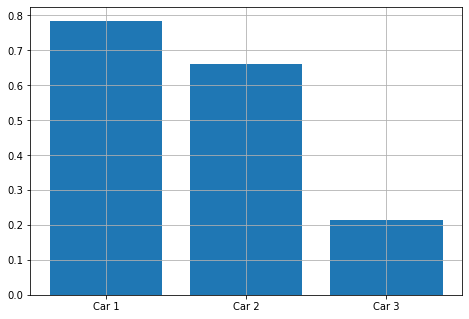

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cars = ['Car 1', 'Car 2', 'Car 3']
ax.bar(cars, relative_proximity)
plt.grid(1)
plt.show()